In [1]:
import numpy as np
from mask_utils import *
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit

In [2]:
#Defines FITS event file
fdet = "catalog_noCXB_1Crab_infthinmask_2-50keV_1ks_cam1a_detected.fits"

In [3]:
#Reads events and headers
det, hdet0, hdet1 = read_fits_events(fdet, header0=True, header1=True, verbose=False)

In [4]:
#Filters events by source RA, Dec
pntra = hdet0['INSTZRA']
pntdec = hdet0['INSTZDEC']

det_filtered = filter_source(det, pntra, pntdec, verbose=True)

Selected 98185 out of 531402 events


In [5]:
#Reads rmatrix and bulk images
rmatrix, hdmask = read_mask_bulk('wfm_mask.fits', 3, header_out=True, verbose=False)
bulk = read_mask_bulk('wfm_mask.fits', 4, verbose=False)

In [6]:
#Gets mask information and define X, Y vectors (centers and edges)
ELXDIM = hdmask['ELXDIM']
ELYDIM = hdmask['ELYDIM']
ELXN   = hdmask['ELXN']
ELYN   = hdmask['ELYN']

"""
#Generate pixel coords (centers) in mask reference frame
xcoords = np.arange(0, ELXDIM * ELXN, ELXDIM) + ELXDIM/2 - (ELXDIM * ELXN)/2
ycoords = np.arange(0, ELYDIM * ELYN, ELYDIM) + ELYDIM/2 - (ELYDIM * ELYN)/2
"""
xedges, yedges = get_detimage_edges(ELXDIM, ELYDIM, ELXN, ELYN)

print(np.min(xedges), np.max(xedges), xedges[1] - xedges[0])

-130.0 130.0 0.25


In [7]:
#Computes detector image
detimage = get_detimage(det_filtered, xedges, yedges)

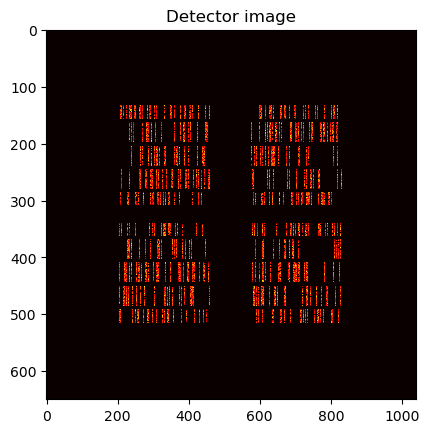

In [8]:
#Showing detimage
plt.title('Detector image')
plt.imshow(detimage.T**0.5, cmap=cm.hot,  interpolation='nearest', aspect=ELYDIM/ELXDIM)
plt.show()

In [9]:
#Computes balanced sky image
skyimage = decode(detimage, rmatrix, bulk)

In [10]:
#Finds image peak
peak = np.unravel_index(np.argmax(skyimage), skyimage.shape)

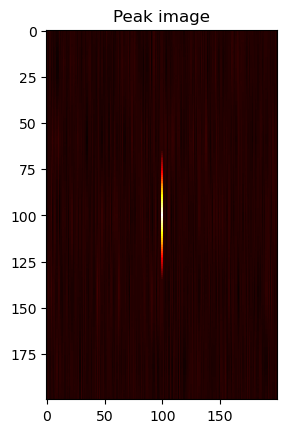

In [11]:
#Showing skyimage peak
rr = 100
plt.title('Peak image')
plt.imshow(skyimage[peak[0]-rr: peak[0]+rr,  peak[1]-rr: peak[1]+rr].T, cmap=cm.hot,  interpolation='nearest', aspect=ELYDIM/ELXDIM)
plt.show()

In [12]:
xsky, ysky = get_skycoords(skyimage, ELXDIM, ELYDIM, 202.9, verbose=True)

X bins range: -259.875 259.875
Y bins range: -259.8 259.8


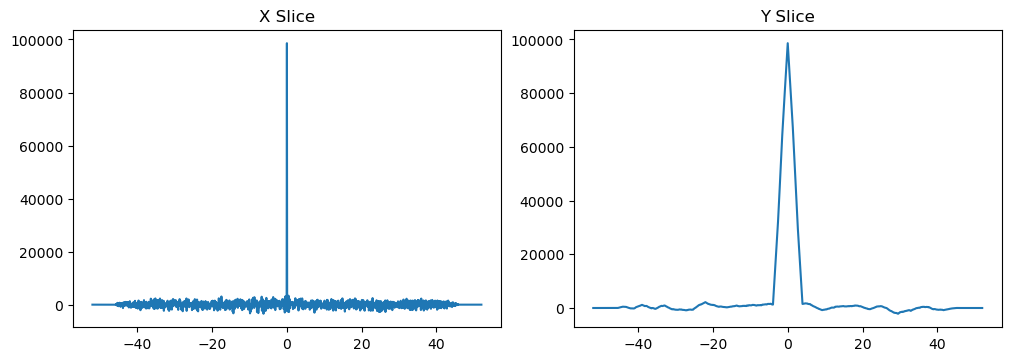

In [13]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3.5))
axs[0].set_title('X Slice')
axs[0].plot(xsky, skyimage[: ,peak[1]])
axs[1].set_title('Y Slice')
axs[1].plot(ysky, skyimage[peak[0], : ])
plt.show()